# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Raihan Tsabita Sabil
- **Email:** raihan.sabili@gmail.com

## Menentukan Pertanyaan Bisnis

1.   Pertanyaan 1
*   Bagaimana pengaruh musim (season) terhadap jumlah total sewa sepeda harian?
2.   Pertanyaan 2
*   Bagaimana pola penyewaan sepeda per jam dalam sehari, dan apakah ada perbedaan antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [14]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- Mengambil dataset day.csv
- MEngambil dataset hour.csv

### Assessing Data

In [15]:
print("Missing values in day_df:\n", day_df.isnull().sum())
print("Missing values in hour_df:\n", hour_df.isnull().sum())


print("Duplicated rows in day_df: ", day_df.duplicated().sum())
print("Duplicated rows in hour_df: ", hour_df.duplicated().sum())

Missing values in day_df:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Missing values in hour_df:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicated rows in day_df:  0
Duplicated rows in hour_df:  0


**Insight:**
- Tidak ada nilai yang hilang (missing values) pada kedua dataset.
- Tidak ada data duplikat pada kedua dataset.
- Tipe data pada kolom dteday perlu diubah menjadi datetime.

### Cleaning Data

In [16]:
# Mengubah tipe data 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Mengubah nilai numerik menjadi kategori
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['weekday'] = day_df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
day_df['weathersit'] = day_df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

hour_df['season'] = hour_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['weekday'] = hour_df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
hour_df['weathersit'] = hour_df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

**Insight:**
- Mengubah tipe data dteday menjadi datetime
- Mengubah nilai numerik pada beberapa kolom menjadi kategori yang lebih mudah dibaca.


## Exploratory Data Analysis (EDA)

### Explore ...

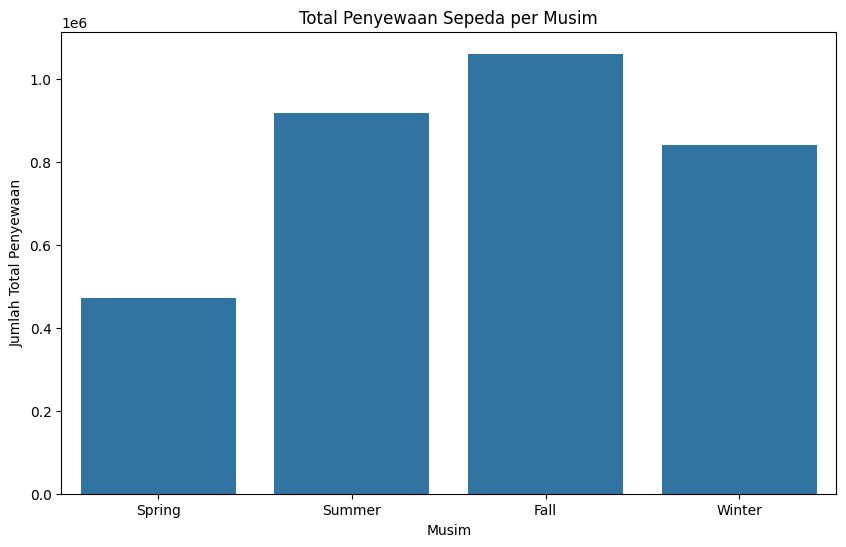

In [17]:
season_rentals = day_df.groupby('season')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=season_rentals, order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Total Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Total Penyewaan')
plt.show()

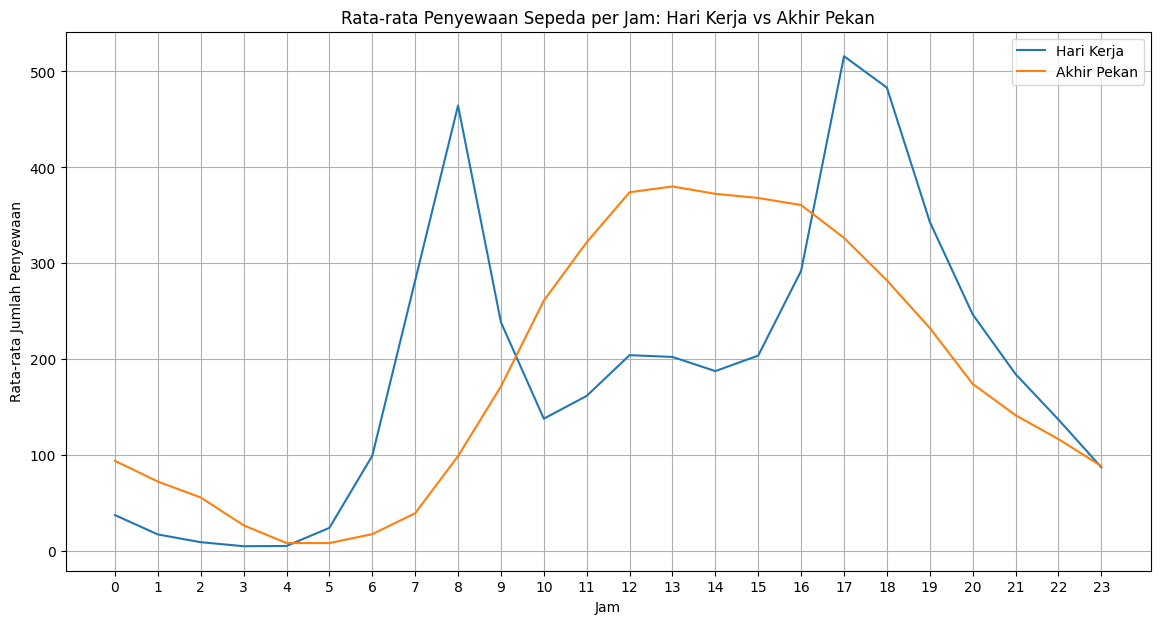

In [18]:
hour_df['is_weekend'] = hour_df['weekday'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

hourly_rentals = hour_df.groupby(['hr', 'is_weekend'])['cnt'].mean().unstack()

hourly_rentals.plot(kind='line', figsize=(14, 7))
plt.title('Rata-rata Penyewaan Sepeda per Jam: Hari Kerja vs Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(np.arange(0, 24, 1))
plt.legend(['Hari Kerja', 'Akhir Pekan'])
plt.grid(True)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:
*   Bagaimana pengaruh musim (season) terhadap jumlah total sewa sepeda harian?

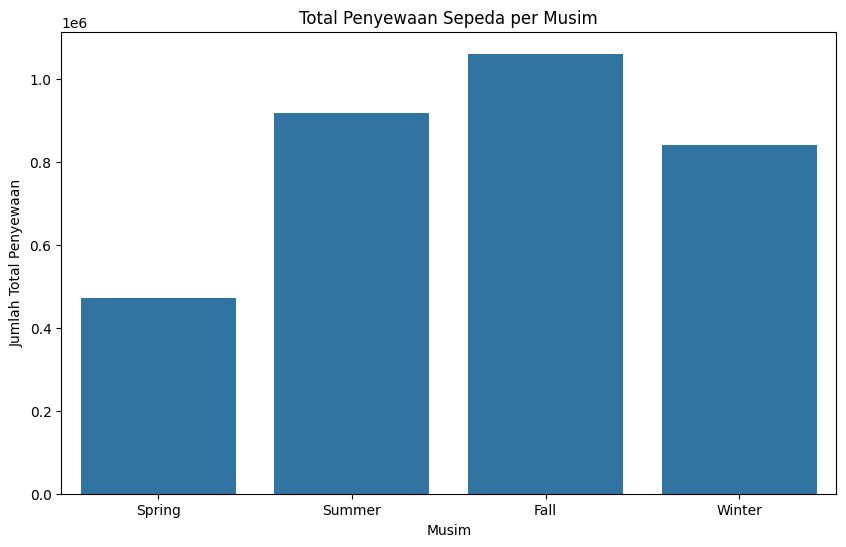

In [19]:
season_rentals = day_df.groupby('season')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=season_rentals, order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Total Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Total Penyewaan')
plt.show()

**Insight:**
- Jumlah penyewaan sepeda tertinggi terjadi pada musim Gugur (Fall).
- Jumlah penyewaan sepeda terendah terjadi pada musim Semi (Spring).
- Hal ini menunjukkan bahwa musim memiliki pengaruh yang signifikan terhadap minat penyewaan sepeda.

### Pertanyaan 2:
*   Bagaimana pola penyewaan sepeda per jam dalam sehari, dan apakah ada perbedaan antara hari kerja dan akhir pekan?

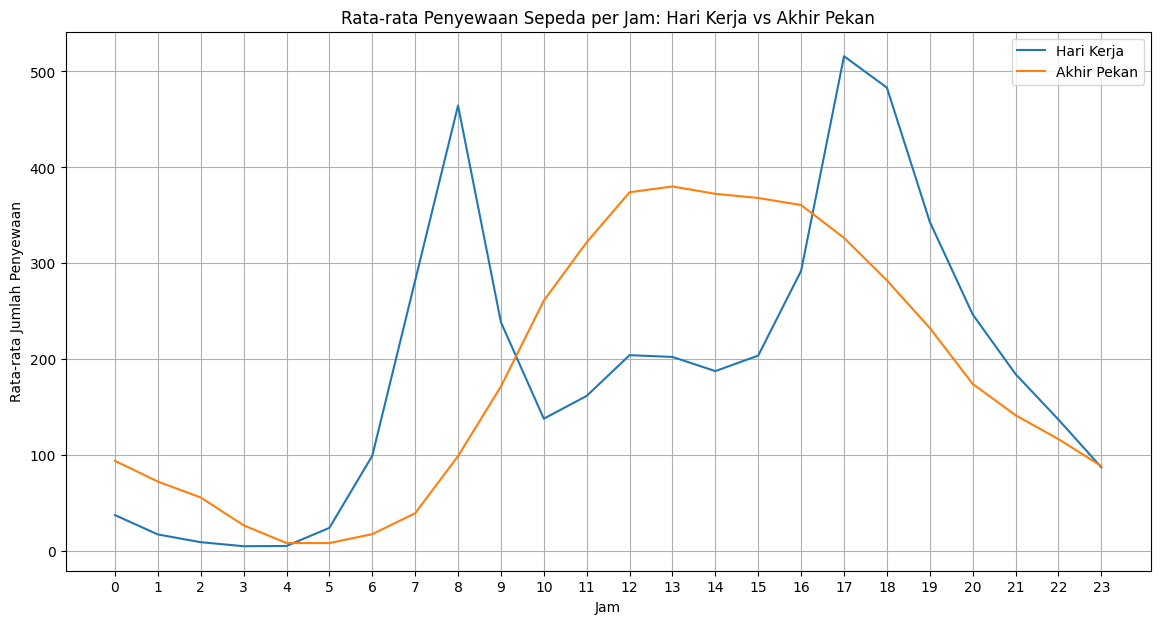

In [20]:
hour_df['is_weekend'] = hour_df['weekday'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

hourly_rentals = hour_df.groupby(['hr', 'is_weekend'])['cnt'].mean().unstack()

hourly_rentals.plot(kind='line', figsize=(14, 7))
plt.title('Rata-rata Penyewaan Sepeda per Jam: Hari Kerja vs Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(np.arange(0, 24, 1))
plt.legend(['Hari Kerja', 'Akhir Pekan'])
plt.grid(True)
plt.show()

**Insight:**
- Pada hari kerja, terdapat dua puncak penyewaan, yaitu pada pagi hari (sekitar jam 8) dan sore hari (sekitar jam 17-18). Puncak ini kemungkinan besar terkait dengan jam berangkat dan pulang kerja.
- Pada akhir pekan, pola penyewaan lebih merata sepanjang hari, dengan puncak pada siang hingga sore hari (sekitar jam 10-18).
- Hal ini menunjukkan adanya perbedaan pola penggunaan sepeda yang signifikan antara hari kerja dan akhir pekan.

## Analisis Lanjutan (Opsional)

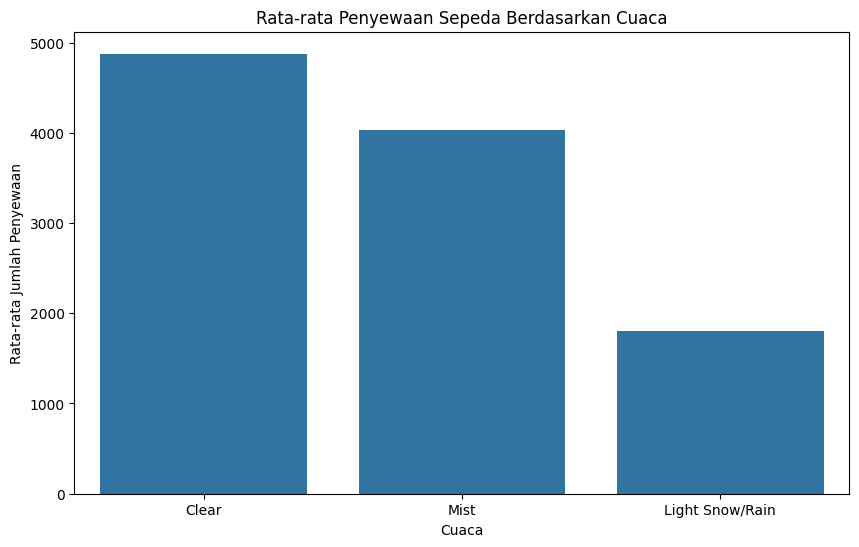

In [21]:
# Melihat pengaruh cuaca terhadap jumlah penyewaan sepeda.

weather_rentals = day_df.groupby('weathersit')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_rentals, order=['Clear', 'Mist', 'Light Snow/Rain'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

**Insight:**
- Cuaca cerah (Clear) memiliki rata-rata penyewaan sepeda tertinggi.
- Cuaca dengan sedikit salju/hujan (Light Snow/Rain) memiliki rata-rata penyewaan terendah.
- Ini mengkonfirmasi bahwa cuaca yang baik sangat mendukung aktivitas penyewaan sepeda.

## Conclusion

- **Conclution pertanyaan 1:** Musim memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda. Jumlah penyewaan tertinggi terjadi pada musim Gugur, diikuti oleh musim Panas dan Dingin. Jumlah terendah terjadi pada musim Semi. Hal ini bisa menjadi pertimbangan bagi perusahaan penyewaan sepeda untuk strategi pemasaran dan operasional.
- **Conclution pertanyaan 2:** Terdapat perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan. Pada hari kerja, puncak penyewaan terjadi pada jam sibuk komuter (pagi dan sore), sedangkan pada akhir pekan, penyewaan lebih banyak terjadi pada siang hari untuk keperluan rekreasi. Pengetahuan ini dapat digunakan untuk mengoptimalkan ketersediaan sepeda di lokasi dan waktu yang tepat.